# Dog breed prection model

To do this, we'll be using data from the Kaggle dog breed identification competition. It consists of a collection of 10,000+ labelled images of 120 different dog breeds.

For this model, I am using **imagenet/mobilenet_v2_130_224/classification** from **TensorFlow Hub**

It is sample notebook of model trained on small data (1000 images only), you can train it further on full Data


In [ ]:
#!unzip "/content/drive/MyDrive/datasets/dog-breed (1)/dog-breed-identification.zip" -d "/content/drive/MyDrive/datasets/dog-breed (1)"

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

print("TF version: ", tf.__version__)
print("TF hub version ", hub.__version__)
print("GPU ","yes" if tf.config.list_physical_devices("GPU") else "no")

TF version:  2.12.0
TF hub version  0.14.0
GPU  yes


In [ ]:
import pandas as pd

In [ ]:
df_labels = pd.read_csv("/content/drive/MyDrive/datasets/dog-breed/labels.csv")
df_labels.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

<Axes: >

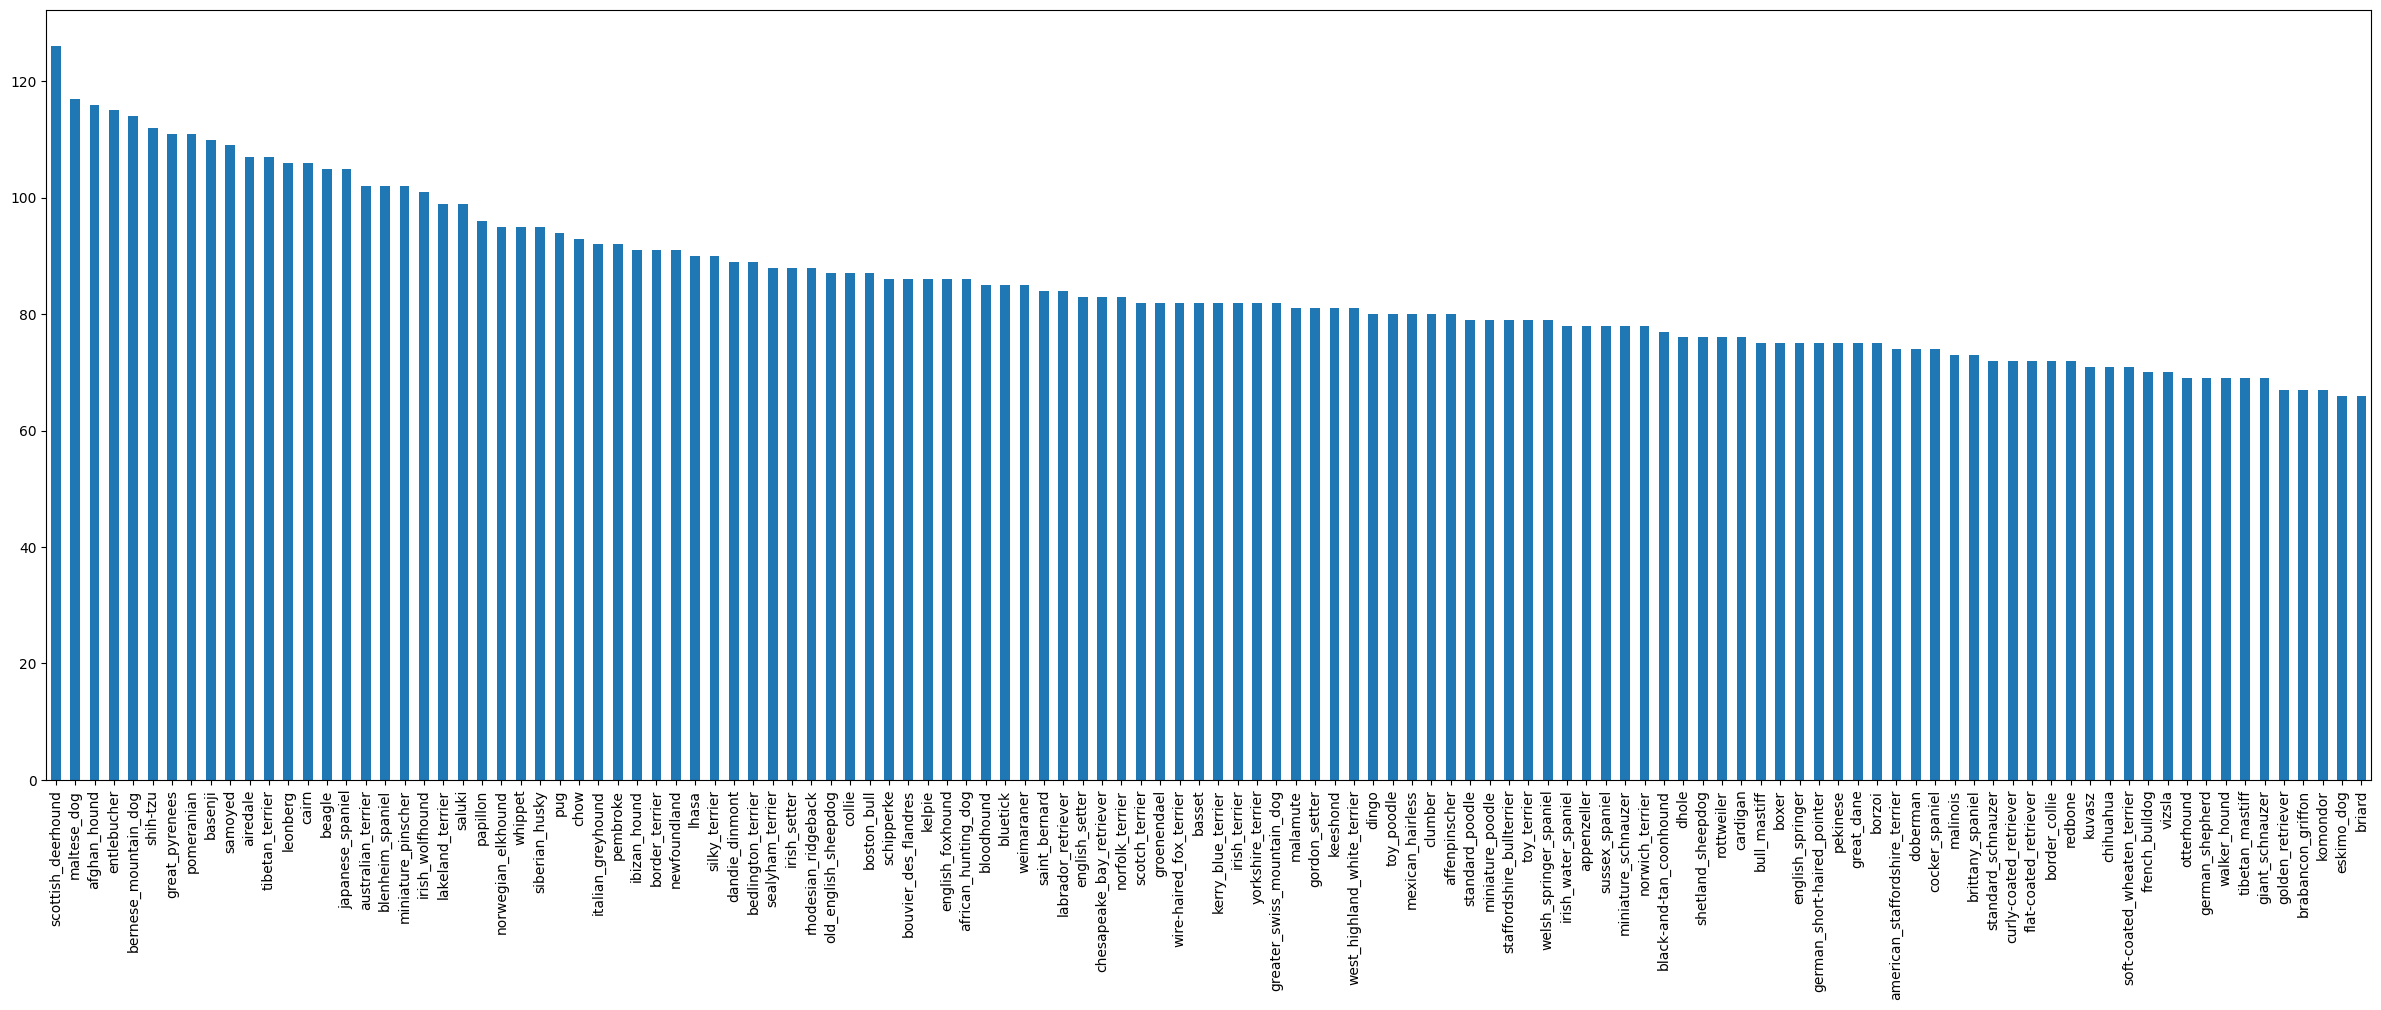

In [ ]:
df_labels["breed"].value_counts().plot.bar(figsize=(30,10))

# creating a file store

In [ ]:
filenames = ["/content/drive/MyDrive/datasets/dog-breed/train/"+filen+".jpg" for filen in df_labels["id"]]
filenames[:10]

['/content/drive/MyDrive/datasets/dog-breed/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/datasets/dog-breed/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/datasets/dog-breed/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/datasets/dog-breed/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/datasets/dog-breed/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/datasets/dog-breed/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/datasets/dog-breed/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/datasets/dog-breed/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/datasets/dog-breed/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/datasets/dog-breed/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
import os

if len(os.listdir("/content/drive/MyDrive/datasets/dog-breed/train")) == len(filenames):
  print("matched")
else:
  print("not matched")

matched


In [ ]:
df_labels.size

20444

In [ ]:
labels = df_labels["breed"].to_numpy()
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [ ]:
len(labels)

10222

# Collecting unique labels

In [ ]:
import numpy as np
unique_labels = np.unique(labels)
len(unique_labels)

120

# Creating bool labels

In [ ]:
bool_labels = [label == unique_labels for label in labels]
bool_labels[:3]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
if len(bool_labels) == len(labels):
  print("equal")

else:
  print("not equal")

equal


In [ ]:
len(bool_labels)

10222

In [ ]:
len(unique_labels)

120

# Getting data ready

In [ ]:
x = filenames
y = bool_labels

In [ ]:
NUM_IMAGES = 1000 #@param (type : "slider" , min:1000, max:10000)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],y[:NUM_IMAGES],
                                                    test_size = 0.2,
                                                    random_state = 42)



In [ ]:
len(x_train), len(x_val), len(y_train), len(y_val)

(800, 200, 800, 200)

# Converting images to tensors

In [ ]:
IMG_SIZE = 224 #@param

In [ ]:
def image_processor(image_path, image_size  = IMG_SIZE):
  image = tf.io.read_file(image_path)

  image = tf.image.decode_jpeg(image, channels=3)

  image = tf.image.convert_image_dtype(image, tf.float32)

  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

In [ ]:
image_processor(filenames[20])

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.4686362 , 0.48284388, 0.4388923 ],
        [0.43491846, 0.46069017, 0.4125102 ],
        [0.45447832, 0.4979307 , 0.44302875],
        ...,
        [0.43456125, 0.5049195 , 0.28860298],
        [0.39823228, 0.4980573 , 0.26960978],
        [0.37409884, 0.48390275, 0.24988663]],

       [[0.43431306, 0.46279556, 0.4211807 ],
        [0.43068317, 0.4688092 , 0.42564145],
        [0.45039746, 0.49808303, 0.45071962],
        ...,
        [0.43917897, 0.51070905, 0.3056251 ],
        [0.3906706 , 0.4944172 , 0.2534024 ],
        [0.34645557, 0.4601811 , 0.20911317]],

       [[0.41501755, 0.4622952 , 0.4238247 ],
        [0.40084037, 0.4505865 , 0.40968493],
        [0.44426945, 0.4941148 , 0.45284492],
        ...,
        [0.4272146 , 0.50133634, 0.31526017],
        [0.38620418, 0.48767138, 0.25313336],
        [0.33333334, 0.44705886, 0.19360997]],

       ...,

       [[0.8738844 , 0.8699628 , 0.8621197 ],
        [0.84

# Turning data into batches


In [ ]:
def get_image_label(image_path, label):
  image = image_processor(image_path)
  return image, label

In [ ]:
get_image_label(x[40],tf.constant(y[40]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.99609005, 0.96119833, 0.95770377],
         [0.98501533, 0.94666374, 0.93379605],
         [0.99749774, 0.9770274 , 0.9565523 ],
         ...,
         [0.34569168, 0.5497533 , 0.22850783],
         [0.4276134 , 0.6322353 , 0.33483163],
         [0.36833197, 0.5772412 , 0.29097825]],
 
        [[0.9687435 , 0.965289  , 0.9172323 ],
         [0.94134724, 0.93233955, 0.8760108 ],
         [0.92182285, 0.9180851 , 0.8512452 ],
         ...,
         [0.36644298, 0.57037514, 0.24943131],
         [0.36225268, 0.5662274 , 0.2703323 ],
         [0.34930357, 0.5534058 , 0.27435333]],
 
        [[0.82989013, 0.87487435, 0.75133675],
         [0.7506709 , 0.7958162 , 0.66784185],
         [0.75523835, 0.8078179 , 0.67545015],
         ...,
         [0.40426058, 0.60512996, 0.2932135 ],
         [0.35947898, 0.55773896, 0.2682605 ],
         [0.38644102, 0.5856088 , 0.3115852 ]],
 
        ...,
 
        [[0.45484307, 0.5300532 

# Creating data into Batches(32)

* Creating a fnc for making batches for validation data as well as test data


In [ ]:
BATCH_SIZE = 32 #@param

In [ ]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(image_processor).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
train_data = create_data_batches(x_train,y_train)
val_data = create_data_batches(x_val,y_val,valid_data = True)

Creating training data batches...
Creating validation data batches...


In [ ]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_labels[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

## Visualising train data


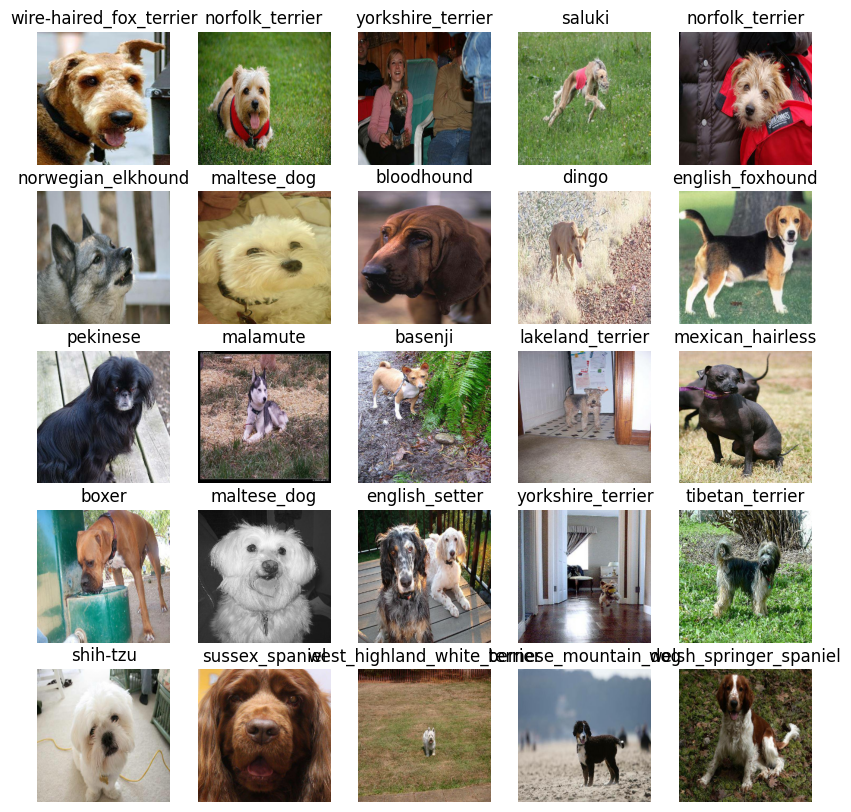

In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

## Visualsing validation data



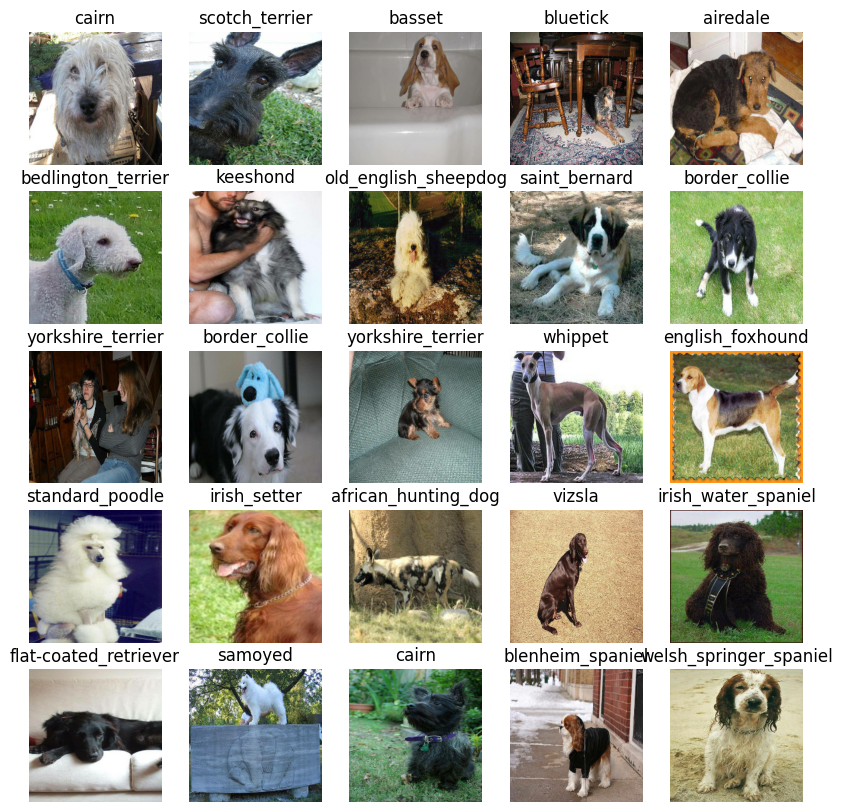

In [ ]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

## setting up inputs and outputs


In [ ]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]
OUTPUT_SHAPE = len(unique_labels)
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

In [ ]:
def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):
  print("Building a modelll...........")

# creating a sequential model
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL),
      tf.keras.layers.Dense(units = output_shape,
                            activation = "softmax")
  ])
# compiling a model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ["accuracy"]
  )

# building a model
  model.build(input_shape)

  return model

In [ ]:
model = create_model()
model.summary()

Building a modelll...........
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


# Creating tensorflow callbacks

In [ ]:
%load_ext tensorboard

In [ ]:
import datetime

def create_tensor_callbacks():
  logdir = os.path.join('/content/drive/MyDrive/datasets/dog-breed/logs',
                        datetime.datetime.now().strftime('%y%m%d-%H%M%S'))
  return tf.keras.callbacks.TensorBoard(logdir)

# Early stopping callbacks

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy",
                                                  patience=3)

# Fitting a model
creating a func to fit a model and creatig epoches


In [ ]:
NUM_EPOCHS = 100 #@param {"type": "slider", "min": "10", "max":"100", "step":"10"  }

In [ ]:
def train_model():
  model = create_model()

  tensorboard = create_tensor_callbacks()

  model.fit(x = train_data,
            epochs= NUM_EPOCHS,
            validation_data= val_data,
            validation_freq = 1,
            callbacks=[early_stopping, tensorboard])

  return model

In [ ]:
import os

In [ ]:
model = train_model()

Building a modelll...........
Epoch 1/100
25/25 [==============================] - 20s 164ms/step - loss: 4.6327 - accuracy: 0.1013 - val_loss: 3.5060 - val_accuracy: 0.2400
Epoch 2/100
25/25 [==============================] - 4s 156ms/step - loss: 1.6479 - accuracy: 0.6775 - val_loss: 2.2150 - val_accuracy: 0.4800
Epoch 3/100
25/25 [==============================] - 4s 145ms/step - loss: 0.5629 - accuracy: 0.9312 - val_loss: 1.7343 - val_accuracy: 0.5950
Epoch 4/100
25/25 [==============================] - 3s 123ms/step - loss: 0.2530 - accuracy: 0.9862 - val_loss: 1.5368 - val_accuracy: 0.6300
Epoch 5/100
25/25 [==============================] - 4s 149ms/step - loss: 0.1468 - accuracy: 0.9950 - val_loss: 1.4666 - val_accuracy: 0.6500
Epoch 6/100
25/25 [==============================] - 4s 175ms/step - loss: 0.1003 - accuracy: 0.9987 - val_loss: 1.4160 - val_accuracy: 0.6600
Epoch 7/100
25/25 [==============================] - 3s 121ms/step - loss: 0.0764 - accuracy: 1.0000 - val_loss

In [ ]:
predictions = model.predict(x = val_data,
                            verbose = 1)
predictions

7/7 [==============================] - 2s 141ms/step


array([[8.33619211e-04, 3.48744361e-05, 2.05021031e-04, ...,
        6.01438296e-05, 1.69062059e-05, 9.69100336e-04],
       [2.56144704e-04, 6.43040112e-04, 1.25977714e-02, ...,
        5.57800755e-04, 2.24347273e-03, 3.31773655e-04],
       [2.18625132e-06, 2.40146415e-04, 1.63823730e-04, ...,
        8.14359984e-04, 2.05393997e-04, 1.06262206e-03],
       ...,
       [2.87896387e-06, 1.96630226e-05, 6.69441433e-05, ...,
        8.54972404e-06, 8.08642581e-05, 7.58346432e-05],
       [1.76692172e-03, 1.50437467e-04, 1.75866648e-04, ...,
        1.08703702e-04, 2.06578523e-04, 1.03193065e-02],
       [5.97007864e-04, 2.58213149e-05, 2.22262880e-03, ...,
        1.67092844e-03, 1.65114889e-03, 2.83110130e-05]], dtype=float32)

In [ ]:
def get_pred_label(prediction):
  return unique_labels[np.argmax(prediction)]



In [ ]:
get_pred_label(predictions[0])

'cairn'

In [ ]:
def get_labels_images(data_pass):
  images=[]
  labels =[]
  for image,label in data_pass.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_labels[np.argmax(label)])

  return images, labels


In [ ]:
val_images, val_labels_ = get_labels_images(val_data)

# Visualising predictions

In [ ]:
def pred_prob(pred_probability, labels, images, n=1):
  pred_prob, true_label, image = pred_probability[n], labels[n], images[n];
  pred_label = unique_labels[np.argmax(pred_prob)]

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  if(pred_label == true_label):
    color = "green"
  else:
    color = "red"
  plt.title(f"{pred_label} is predicted at {int(np.max(pred_prob)*100)}% actual = {true_label}", color = color)

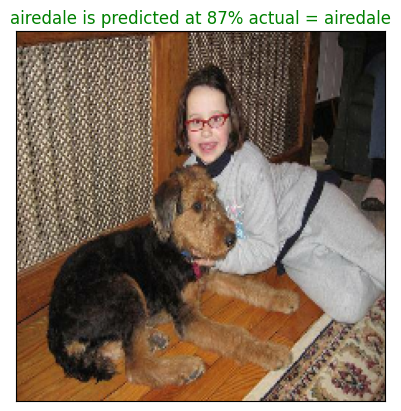

In [ ]:
pred_prob(pred_probability=predictions,
          labels = val_labels_,
          images = val_images,
          n = 75)

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_labels[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  plt.title(true_label)
  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

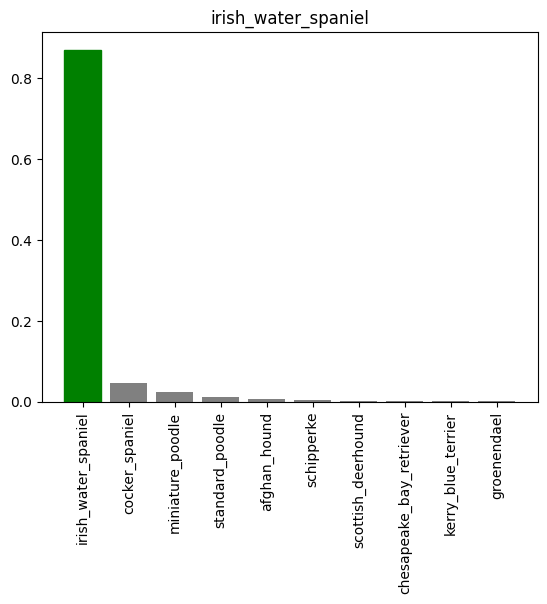

In [ ]:
plot_pred_conf(predictions, val_labels_, 19)

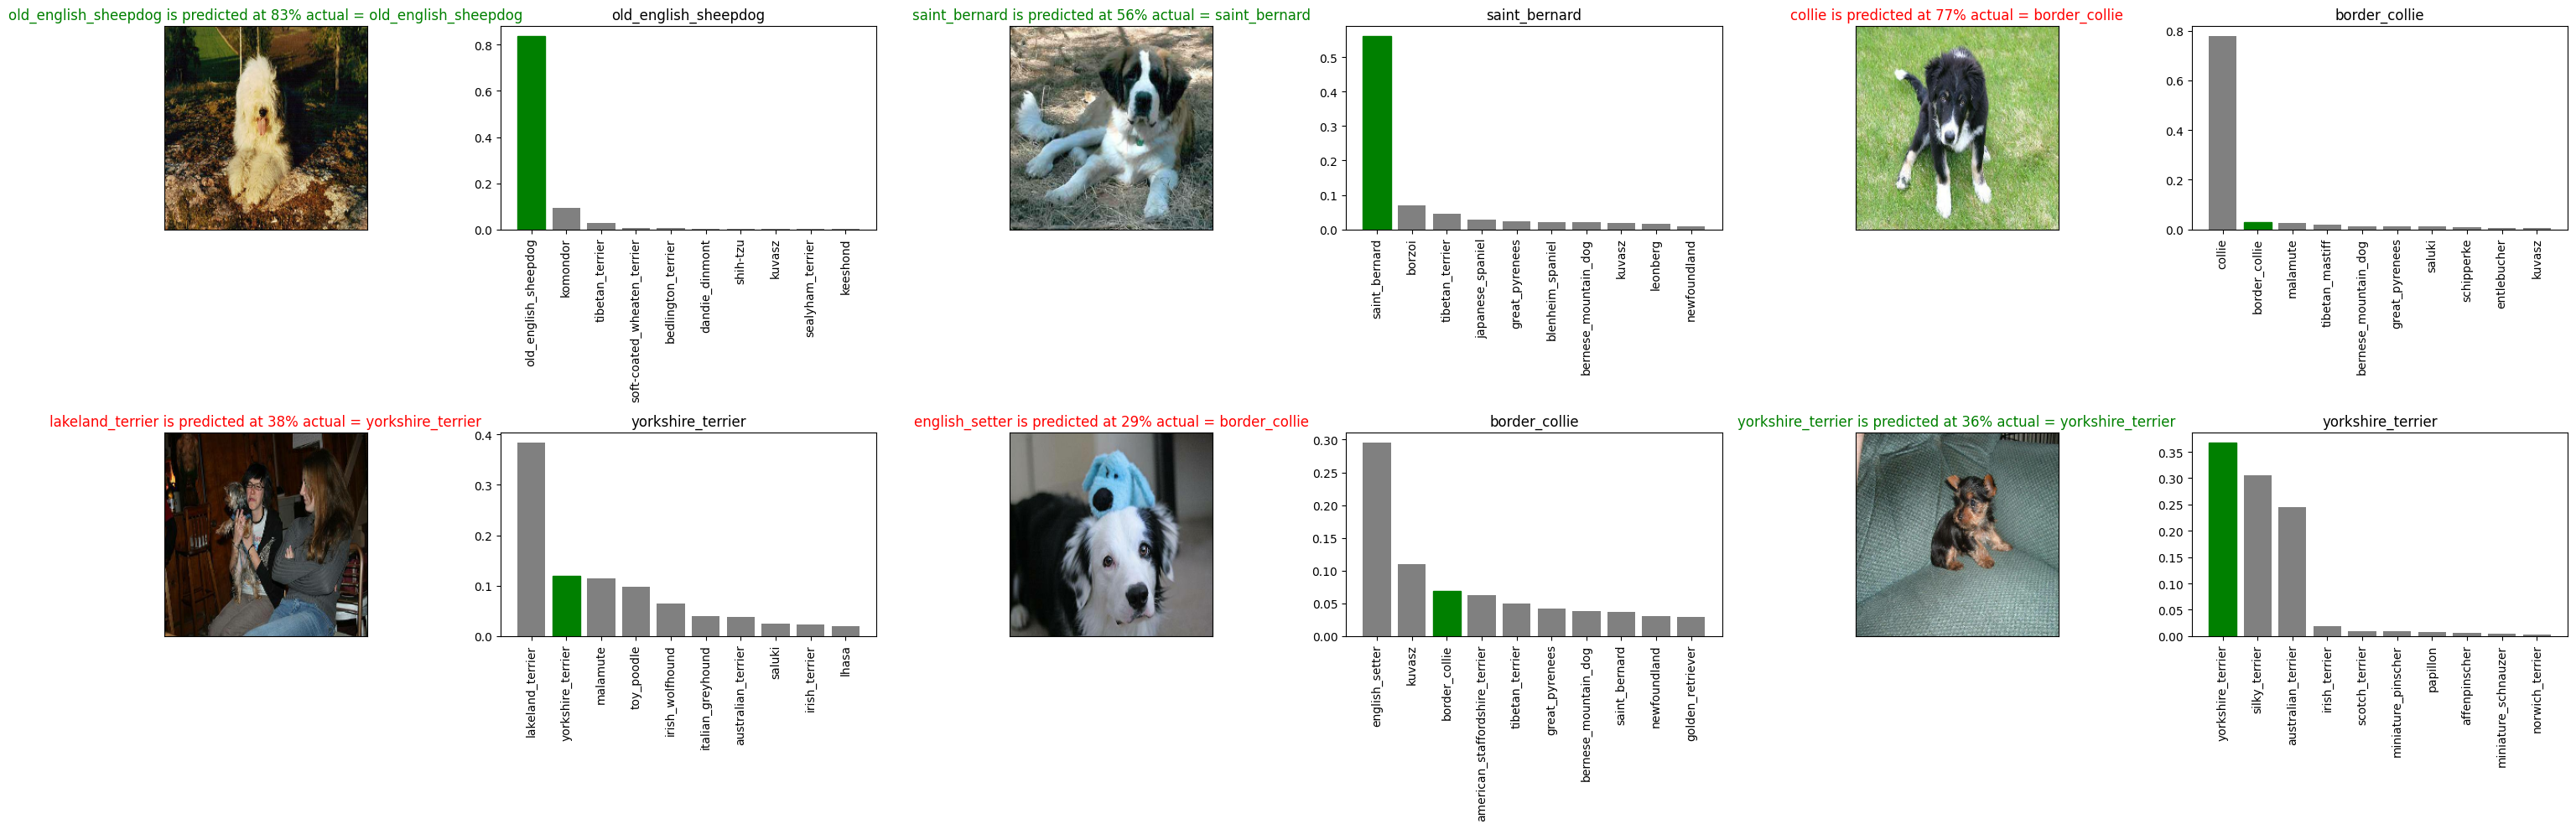

In [ ]:
i_multiplier = 7
num_cols = 3
num_rows = 2
num_images = num_cols*num_rows

plt.figure(figsize = (5*2*num_cols,5*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2* num_cols, 2*i+1)
  pred_prob(predictions, val_labels_,val_images, i+i_multiplier)
  plt.subplot(num_rows, 2* num_cols, 2*i+2)
  plot_pred_conf(predictions, val_labels_, i+i_multiplier)

plt.tight_layout()
plt.show()

# Saving and loading model

In [ ]:
def save_model(model, suffix = None):
  model_dir = os.path.join("/content/drive/MyDrive/datasets/dog-breed/models" + datetime.datetime.now().strftime("%y%m%d-%H%M%s"))
  model_path = model_dir +"-"+ suffix + ".h5"
  print(f"saving model at{model_path}............")
  model.save(model_path)
  return model_path

In [ ]:
save_model(model,"1000-images-trained-model")

saving model at/content/drive/MyDrive/datasets/dog-breed/models230810-09241691659487-1000-images-trained-model.h5............


'/content/drive/MyDrive/datasets/dog-breed/models230810-09241691659487-1000-images-trained-model.h5'

In [ ]:
def load_model(model_path):
  print(f"loading a model from {model_path}")

  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})

  return model

In [ ]:
loaded_model = load_model("/content/drive/MyDrive/datasets/dog-breed/models230810-09241691659487-1000-images-trained-model.h5")

loading a model from /content/drive/MyDrive/datasets/dog-breed/models230810-09241691659487-1000-images-trained-model.h5


In [ ]:
model.evaluate(val_data)

7/7 [==============================] - 1s 152ms/step - loss: 1.2964 - accuracy: 0.6700


[1.2963874340057373, 0.6700000166893005]

In [ ]:
loaded_model.evaluate(val_data)

7/7 [==============================] - 3s 204ms/step - loss: 1.2964 - accuracy: 0.6700


[1.2963874340057373, 0.6700000166893005]